# Heart Disease Prediction using Random Forest


###1. Mount Google Drive and Verify Dataset Path


In [31]:
# Mount Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Install and Import Libraries

Additionally, checks for version of numpy and SHAP.
Versions expected are `numpy 2.0.2` and `SHAP 0.48.0`





In [32]:
!pip install pandas scikit-learn shap
!pip install shap numpy
!pip install --upgrade shap

In [33]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import shap

print(np.__version__)
print(shap.__version__)


2.0.2
0.48.0


### 3. Load and clean dataset

*  We remove duplicates and we check before and after how many were dropped
*  Check if there were any missing values in the columns

In [34]:
# Load the Dataset
csv_path = '../data/heart.csv'
df = pd.read_csv(csv_path)
print("Check first 5 rows of the dataset:")
display(df.head())
print(len(df))

print(f"Number of rows before dropping duplicates: {len(df)}")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of rows after dropping duplicates: {len(df)}")

# Check if there arer missing values
print("Missing values in each column:")
print(df.isnull().sum())

Check first 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1025
Number of rows before dropping duplicates: 1025
Number of duplicate rows: 723
Number of rows after dropping duplicates: 302
Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 3. Convert Categorical columns to `category` datatype

In [35]:

categorical_cols = [
    'sex',        # 1 = male, 0 = female
    'cp',         # chest pain type
    'fbs',        # fasting blood sugar
    'restecg',    # resting ECG
    'exang',      # exercise-induced angina
    'slope',      # slope of ST segment
    'thal'        # thalassemia
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


### 4. Prepare Dataset for Training

*   Define Features and Target
*   One-hot encode categorical variables
*   Verify shape and feature columns
*   Split data into training and test sets (80% training, 20% test)

In [36]:
# Define Features (X) and Target (y)
target = 'target'
X = df.drop(columns=[target])
y = df[target]


# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)


print("Encoded feature columns:")
print(X.columns)
print(X.head())

print(f"Shape of X: {X.shape}")
print("Feature columns:")
print(X.columns.tolist())

# Split the dataset
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

Encoded feature columns:
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')
    age  trestbps   chol  thalach  oldpeak   ca  sex_1  cp_1  cp_2  cp_3  \
0  52.0     125.0  212.0    168.0      1.0  2.0    1.0   0.0   0.0   0.0   
1  53.0     140.0  203.0    155.0      3.1  0.0    1.0   0.0   0.0   0.0   
2  70.0     145.0  174.0    125.0      2.6  0.0    1.0   0.0   0.0   0.0   
3  61.0     148.0  203.0    161.0      0.0  1.0    1.0   0.0   0.0   0.0   
4  62.0     138.0  294.0    106.0      1.9  3.0    0.0   0.0   0.0   0.0   

   fbs_1  restecg_1  restecg_2  exang_1  slope_1  slope_2  thal_1  thal_2  \
0    0.0        1.0        0.0      0.0      0.0      1.0     0.0     0.0   
1    1.0        0.0        0.0      1.0      0.0      0.0     0.0     0.0   
2    0.0        1.0        0.0      1.0      0.0      0.0

### 5. Create and Train the Random Forest Model
*   Use the Random Forest from scikit-learn with 100 decision trees on our dataset
*   Make predictions on the test set `X_test`



In [37]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=SEED)
model.fit(X_train, y_train)

# Predict on Test Set
y_pred = model.predict(X_test)

### 6. Evaluating the Results
*   Used `classification_report()` a function from sklearn that creates precision, recall, and f1-score
*   Used Seaborn's heatmap function to view confusion matrix
*   Create a bar chart that ranks all the features from most to least importance




Accuracy Score: 0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



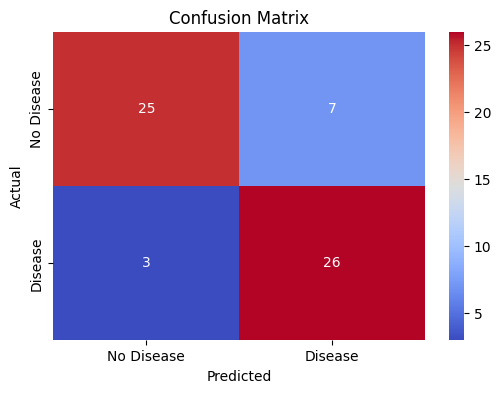

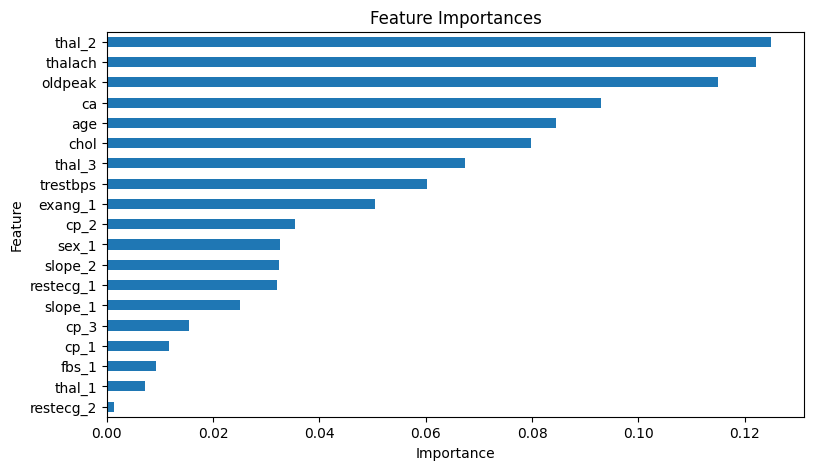

In [38]:
# Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Disease', 'Disease']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(9,5))
importances.sort_values(ascending=True).tail(19).plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [39]:
print(X.dtypes)


age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
ca           float64
sex_1        float64
cp_1         float64
cp_2         float64
cp_3         float64
fbs_1        float64
restecg_1    float64
restecg_2    float64
exang_1      float64
slope_1      float64
slope_2      float64
thal_1       float64
thal_2       float64
thal_3       float64
dtype: object


## SHAP (SHapley Additive exPlanations)

We will use SHAP to try and explain the model and see how each feature contributes to the predictions

### 1. Initialize SHAP and Create a Tree Explainer
*   Class 1 represents disease while class 0 represents no disease
*   Check the shape of SHAP values
*   Create summary plot for class 1. It shows how each feature impacts the dataset



 90%|==================  | 545/604 [00:11<00:01]       

shap_values shape: (302, 19, 2)
shap_class1 shape: (302, 19)


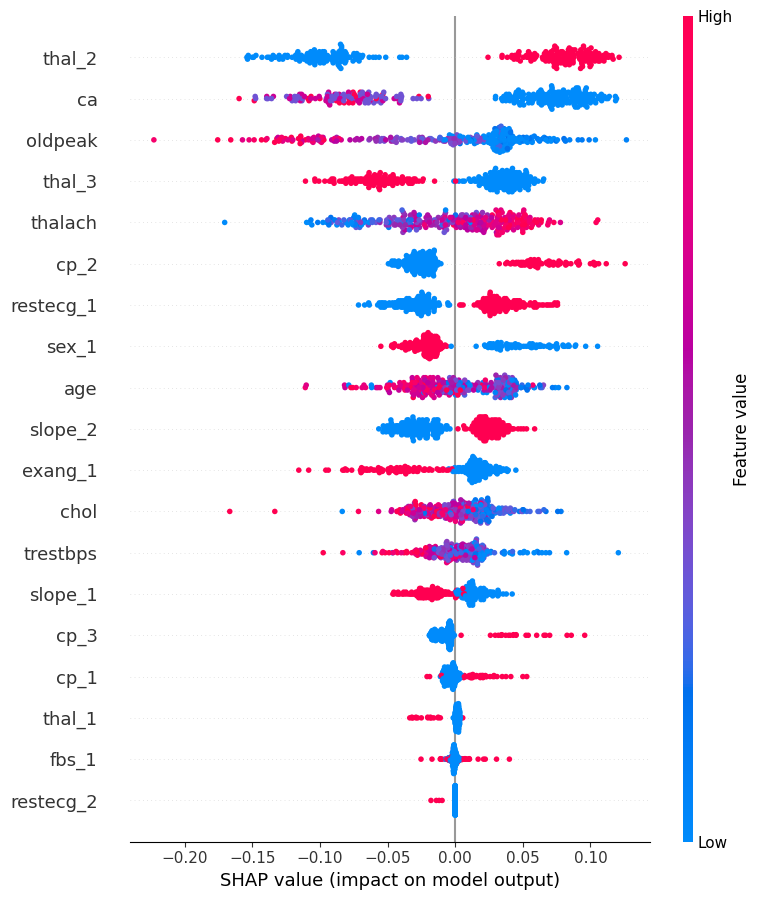

interaction_values shape: (302, 19, 19, 2)


In [40]:
explainer = shap.TreeExplainer(model, data=X)


# Compute SHAP values
shap_values = explainer(X, check_additivity=False) # set to false to avoid warnings
print(f"shap_values shape: {shap_values.values.shape}")

# Focus on class 1 (Disease)
shap_class1 = shap_values.values[:, :, 1]  # class index 1 = disease
print(f"shap_class1 shape: {shap_class1.shape}")

# SHAP summary plot for class 1
shap.summary_plot(shap_class1, X)

# SHAP interaction values
interaction_values = explainer.shap_interaction_values(X)
print(f"interaction_values shape: {interaction_values.shape}")
# Expected: rows, feature1, feature2, classes


Based on the chart, the presence of the types of thalassemia (thal_2, thal_3), (ca), and greater (oldpeak) are the strongest predictors of heart disease.